['ecog_data.csv', 'note.ipynb', 'trial_points.csv']


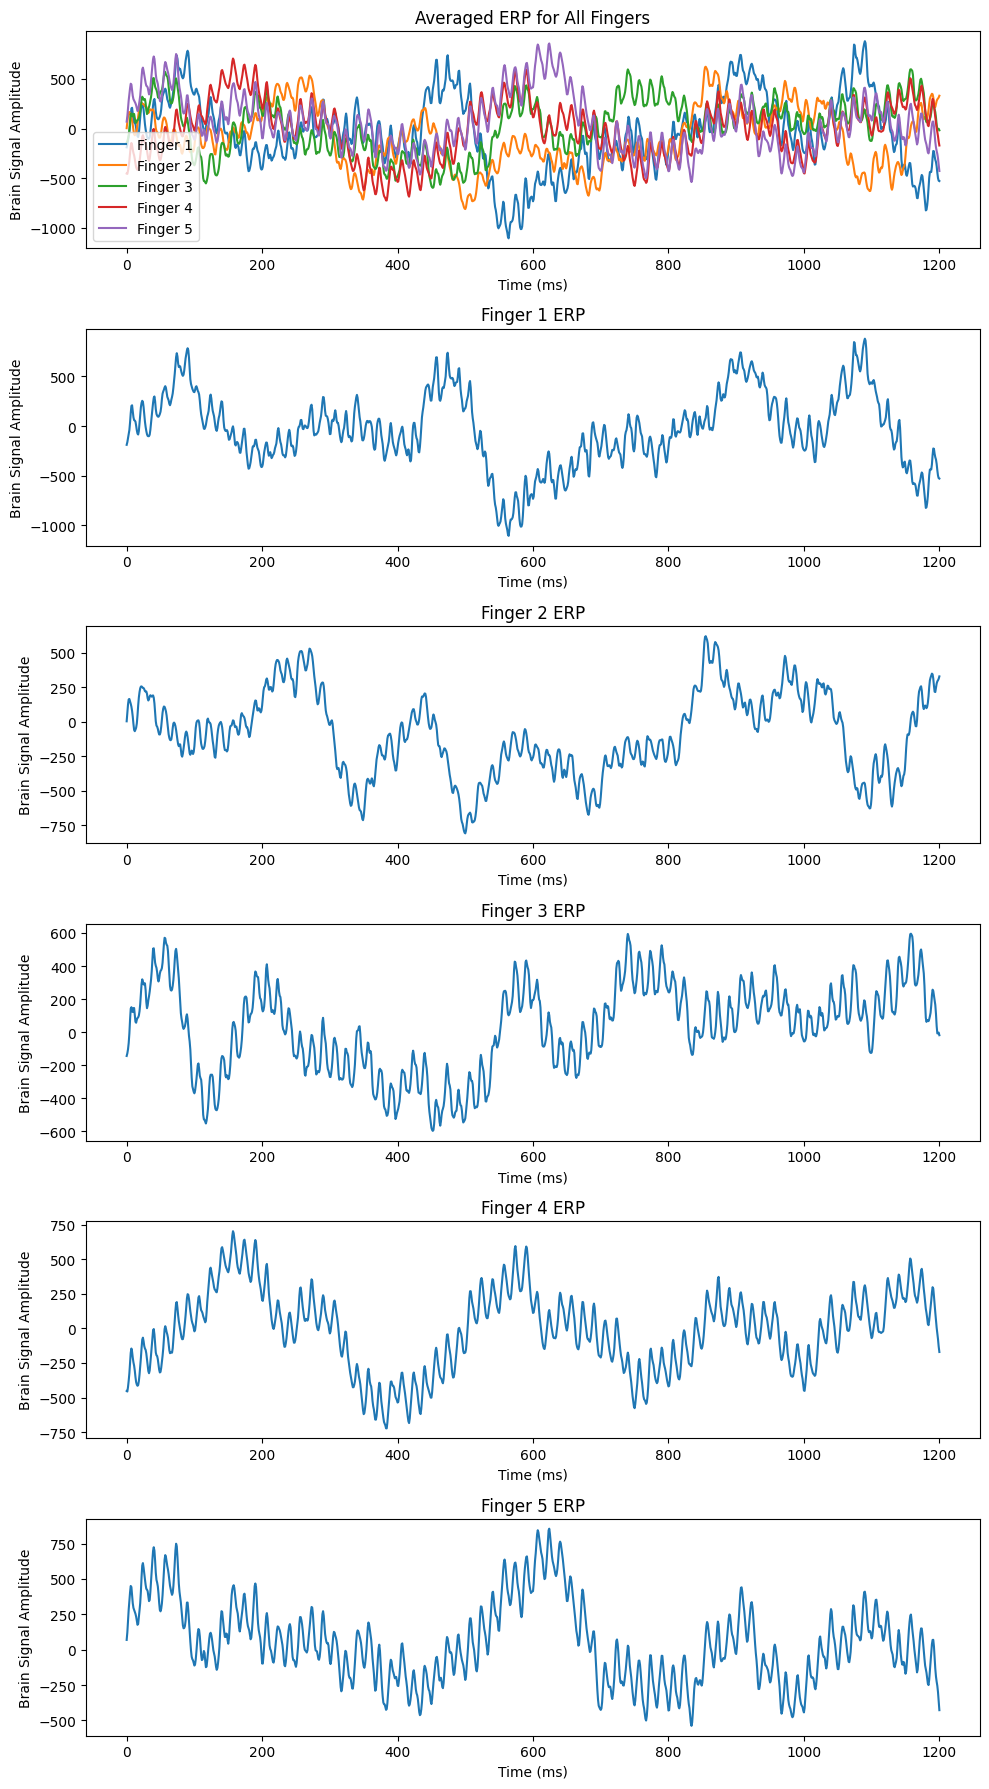

Averaged ERP matrix (5x1201):
[[-189.2109375  -162.4296875  -122.4296875  ... -498.84375
  -524.7890625  -528.375     ]
 [   3.50833333   62.55        125.84166667 ...  301.425
   312.225       329.44166667]
 [-143.625      -127.7        -103.08333333 ...   -7.175
    -2.3         -18.125     ]
 [-452.99473684 -456.65263158 -423.70526316 ...  -78.47368421
  -131.38947368 -170.64210526]
 [  69.14864865  122.82432432  207.37837838 ... -300.62162162
  -368.09459459 -427.25675676]]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def calc_mean_erp(trial_points, ecog_data):
    # נטען את קובצי ה-CSV
    trial_points = pd.read_csv(trial_points)
    ecog_data = pd.read_csv(ecog_data)

    # נמיר את כל הערכים בקובץ trial_points לסוג int
    trial_points = trial_points.astype({'start_point': 'int', 'peak_point': 'int', 'finger': 'int'})

    # הגדרת מטריצה שמאחסנת את התגובות הממוצעות של כל אצבע
    fingers_erp_mean = np.zeros((5, 1201))

    # יצירת גרף ראשי עם סאב-גרפים (5 סאב-גרפים + גרף כלל)
    fig, axes = plt.subplots(6, 1, figsize=(10, 18))  # 6 גרפים, 5 סאב-גרפים + גרף כלל

    # גרף משותף למעלה - הצגת התגובה לכל אצבע בצבע שונה
    for finger in range(1, 6):
        # נאתר את כל הנתונים עבור אצבע ספציפית
        finger_trials = trial_points[trial_points['finger'] == finger]

        # נאסוף את כל האותות עבור כל תנועה של אצבע
        finger_data = []
        for _, trial in finger_trials.iterrows():
            start_index = trial['start_point'] - 200  # 200ms לפני תחילת התנועה
            end_index = trial['start_point'] + 1000  # 1000ms אחרי תחילת התנועה
            # לחלץ את הנתונים מה-ECoG עבור טווח הזמן של התנועה
            trial_data = ecog_data.iloc[start_index:end_index+1].values.flatten()
            finger_data.append(trial_data)
        
        # לחשב את הממוצע של כל התנועות עבור האצבע הנבחרת
        fingers_erp_mean[finger-1] = np.mean(finger_data, axis=0)
        
        # הצגת הגרף עבור כל אצבע בסאב-גרף המתאים
        axes[0].plot(fingers_erp_mean[finger-1], label=f'Finger {finger}')
    
    # גרף משותף למעלה (אצבעות 1-5 בצבעים שונים)
    axes[0].set_title('Averaged ERP for All Fingers')
    axes[0].set_xlabel('Time (ms)')
    axes[0].set_ylabel('Brain Signal Amplitude')
    axes[0].legend()

    # הצגת גרפים לכל אצבע בסאב-גרפים מתחת
    for finger in range(1, 6):
        axes[finger].plot(fingers_erp_mean[finger-1])
        axes[finger].set_title(f'Finger {finger} ERP')
        axes[finger].set_xlabel('Time (ms)')
        axes[finger].set_ylabel('Brain Signal Amplitude')

    # הצגת הגרפים
    plt.tight_layout()  # לדחוס את הגרפים כך שלא יתחפפו
    plt.show()

    # הדפסת המטריצה של התגובה הממוצעת לכל אצבע
    print("Averaged ERP matrix (5x1201):")
    print(fingers_erp_mean)

    return fingers_erp_mean

# הצגת כל הקבצים בתיקיית הנתונים
print(os.listdir(r'C:\python advenced\my_2nd_reposatory\mini_project_2'))

# קריאה לפונקציה עם הנתיב המלא של הקבצים
fingers_erp_mean = calc_mean_erp(
    r'C:\python advenced\my_2nd_reposatory\mini_project_2\trial_points.csv', 
    r'C:\python advenced\my_2nd_reposatory\mini_project_2\ecog_data.csv'
)
